<h1>Partie I : Prétraitement des données</h1>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import missingno as msno
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import skew

import warnings
warnings.filterwarnings('ignore')



In [ ]:
#Chargement de la dataset

df = pd.read_csv('../../creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<h3>Taille, types, valeurs manquantes</h3>

In [ ]:
#Quelle est la taille du dataset (nombre de lignes et colonnes) 
df.shape

(284807, 31)

In [ ]:
#les types de données de chaque variable (numérique, catégorielle, date, etc.)
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
# Vérification des valeurs manquantes
(df.isnull().sum())/len(df*100)

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

Le dataset comporte 284807 lignes et 31 colonnes. De plus, nous observons que nos variables sont toutes numeriques et ne comporte aucune valeur manquante

<h3>Doublons et stats de base</h3>

In [ ]:
# Vérifions les doublons
df.duplicated().sum()

1081

In [ ]:
# supprimons les doublons
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

Le dataset comportait 1081 doublons, nous avons donc supprimer ces doublons afin de ne pas avoir des resultats biaisé lors de la prédiction de notre modèle

<h2>Analyse de fond (contexte, cible, déséquilibre)</h2>

<h3>Comprendre les variables (idée générale)</h3>

- Time : secondes depuis la 1ère transaction du dataset.
- Amount : montant de la transaction. 
- V1 à V28 : résultats d’une transformation ACP sur les features originales (anonymisation).
- Class : 0 = transaction normale, 1 = fraude (cible à prédire).

<h3>Déséquilibre des classes</h3>

Nous avons environt la class:  Class
0    283253
1       473
Name: count, dtype: int64
Taux de fraude : 0.001667101358352777


Text(0.5, 1.0, 'Distribution de la variable cible (Class)')

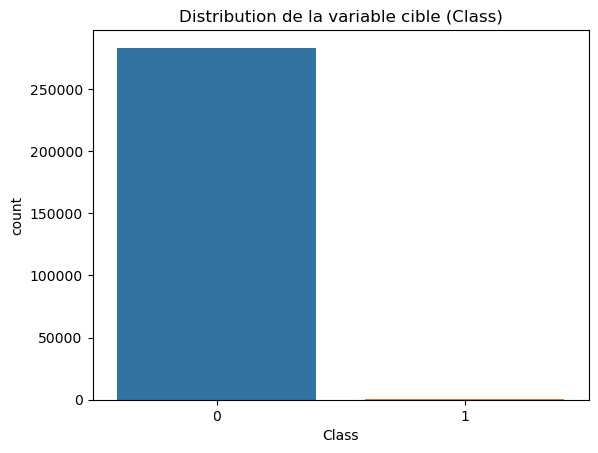

In [ ]:
# Comptage des classes
class_counts = df['Class'].value_counts()
print("Nous avons environt la class: ",class_counts)

# Taux de fraude
fraud_rate = class_counts[1] / class_counts.sum()
print("Taux de fraude :", fraud_rate)


# Distribution de la variable cible (class)
sns.countplot(x='Class', data=df)
plt.title("Distribution de la variable cible (Class)")

Nous avons environ 284315 transactions normales et 492 cas de fraudes, soit 0,17% de fraudes.​

Le graphique montre que les barres ne sont pas du tout équilibrées (presque tout est 0).

Important pour plus tard : les modèles ont tendance à prédire toujours 0 si on ne fait rien.

<h2>
 Distributions univariées
</h2>

<h3>Stats sur toutes les variables numériques</h3>

In [ ]:
# Analyse statistique descriptive
# Calculer les statistiques descriptives (mean, std, min, max, quartiles)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


Le describe nous fait voir en un coup d’oeil la moyennes ≈ 0 pour V1–V2(normal, car elle est issues d’une ACP centrée).​

Amount a une moyenne ≈ 88 et max ≈ 25691.​

Class moyenne ≈ 0.0017 => c’est le taux de fraude.

<h3>Histogrammes pour Time et Amount</h3>

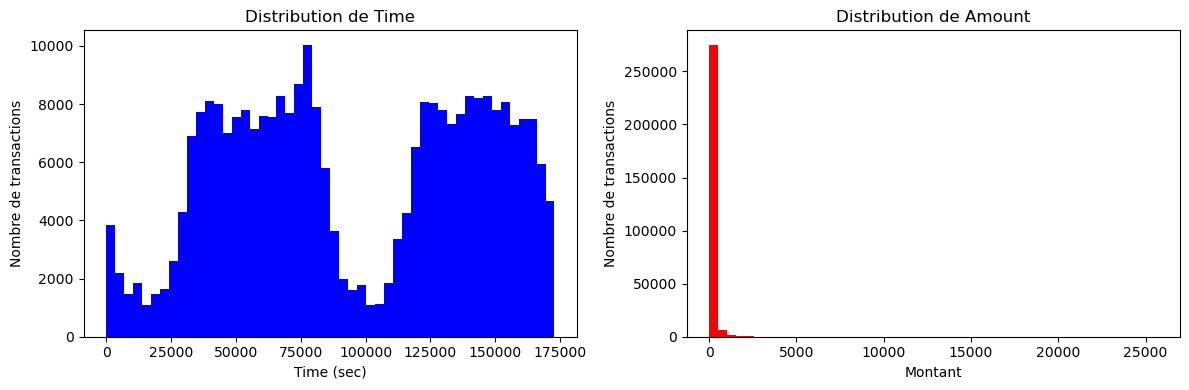

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

axes[0].hist(df['Time'], bins=50, color='blue')
axes[0].set_title('Distribution de Time')
axes[0].set_xlabel('Time (sec)')
axes[0].set_ylabel('Nombre de transactions')

axes[1].hist(df['Amount'], bins=50, color='red')
axes[1].set_title('Distribution de Amount')
axes[1].set_xlabel('Montant')
axes[1].set_ylabel('Nombre de transactions')

plt.tight_layout()
plt.show()

Un histogramme : on découpe l’axe en "cases" et on compte combien de transactions tombent dans chaque case.

On constate que beaucoup de montants sont petits, et rien que quelques montants qui sont très grands (queue longue).

<h2>Corrélations et relations bivariées</h2>

<h3>Matrice de corrélation, par rapport a la variable cible (Class)</3>

In [ ]:
# Corrélation Pearson pour toutes les colonnes
corr_matrix = df.corr(method='pearson')

# Corrélations avec la cible Class
corr_with_class = corr_matrix['Class'].sort_values(ascending=False)
print(corr_with_class)

Class     1.000000
V11       0.149067
V4        0.129326
V2        0.084624
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
V28       0.009682
Amount    0.005777
V22       0.004887
V26       0.004265
V25       0.003202
V15      -0.003300
V13      -0.003897
V23      -0.006333
V24      -0.007210
Time     -0.012359
V6       -0.043915
V5       -0.087812
V9       -0.094021
V1       -0.094486
V18      -0.105340
V7       -0.172347
V3       -0.182322
V16      -0.187186
V10      -0.206971
V12      -0.250711
V14      -0.293375
V17      -0.313498
Name: Class, dtype: float64



Ici, on constate que certaines variables (comme V17, V14, V12, V10, V11…) ont des corrélations plus fortes avec Class (positives ou négatives).​

Ces features sont tres intéressantes pour la détection de fraude.​

<h3>Features les plus importantes</h3>

In [ ]:
# Identifions les features ayant les variances elevees

variances = df.drop(columns="Class", axis=1).var().sort_values(ascending=False)
variances.head()


Time      2.254450e+09
Amount    6.269988e+04
V1        3.794806e+00
V2        2.711631e+00
V3        2.276121e+00
dtype: float64

In [ ]:
# Calculer du skewness (asymétrie) de chaque feature numérique
skewness = df.drop(columns="Class", axis=1).apply(skew).sort_values(ascending=False)

skewness

Amount    16.978714
V28       11.555054
V7         2.890256
V21        2.820018
V6         1.829871
V10        1.252960
V4         0.671501
V26        0.580289
V9         0.537660
V11        0.344072
V19        0.108311
V13        0.064293
Time      -0.035580
V22       -0.182329
V18       -0.248660
V15       -0.309657
V25       -0.415742
V24       -0.552126
V27       -0.753800
V16       -1.051156
V14       -1.918794
V20       -2.043110
V3        -2.151973
V12       -2.198997
V5        -2.414066
V1        -3.273254
V17       -3.690478
V2        -4.695137
V23       -5.867190
V8        -8.310926
dtype: float64

<h3>Visualiser les corrélations des features les plus importantes </h3>

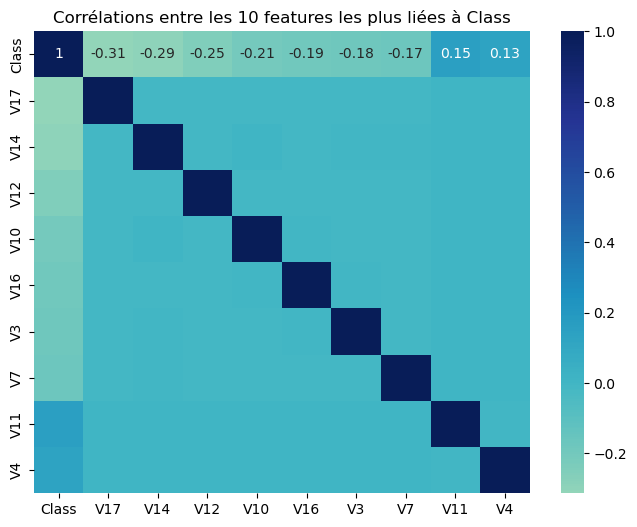

In [ ]:
top_features = corr_with_class.abs().sort_values(ascending=False).head(10).index

plt.figure(figsize=(8,6))
sns.heatmap(df[top_features].corr(), annot=True, cmap='YlGnBu', center=0)
plt.title("Corrélations entre les 10 features les plus liées à Class")
plt.show()

<h3>Comparer Amount entre fraude et non-fraude (boxplot)</h3>

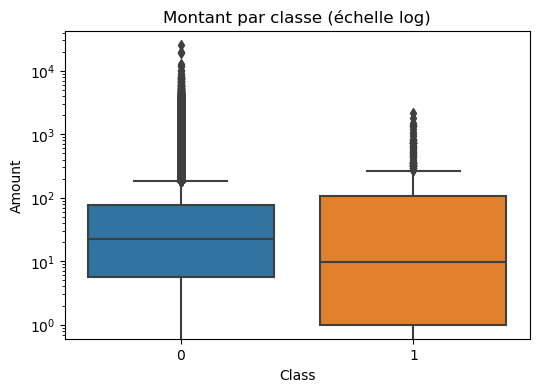

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Class', y='Amount', data=df)
plt.yscale('log')  # échelle log pour mieux voir les différences
plt.title("Montant par classe (échelle log)")
plt.show()

On met les montants sur une échelle logarithmique parce qu’il y a des valeurs très grandes.​

Si la boxplot pour Class=1 est plus "haute", ça veut dire que les fraudes ont souvent des montants plus élevés.

<h3>Scatterplots : deux features vs Class</h3>

On prend par exemple V2 et V3 

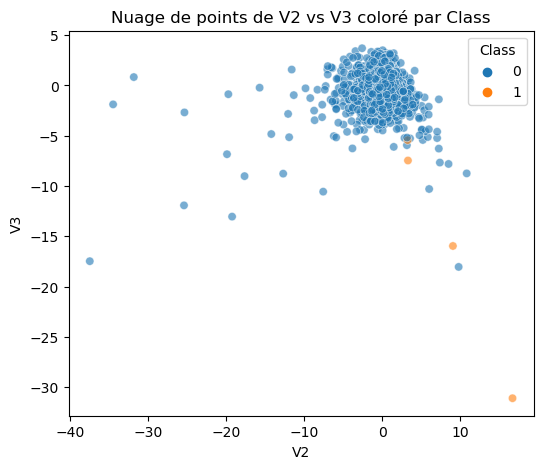

In [ ]:
# On échantillonne un peu pour ne pas afficher 280 milles points
sample = df.sample(5000, random_state=42)

plt.figure(figsize=(6,5))
sns.scatterplot(data=sample, x='V2', y='V3', hue='Class', alpha=0.6)
plt.title("Nuage de points de V2 vs V3 coloré par Class")
plt.show()

NB : Chaque point est une transaction.

La couleur montre si c’est une fraude ou non.

Si les fraudes se regroupent dans une zone particulière du graphique, ces deux variables ensemble aident à les repérer.

<h3>Test de Chi 2 sur une variable discrete</h3>
Le dataset n’a pas de variable catégorielle naturelle comme "type" de transaction.

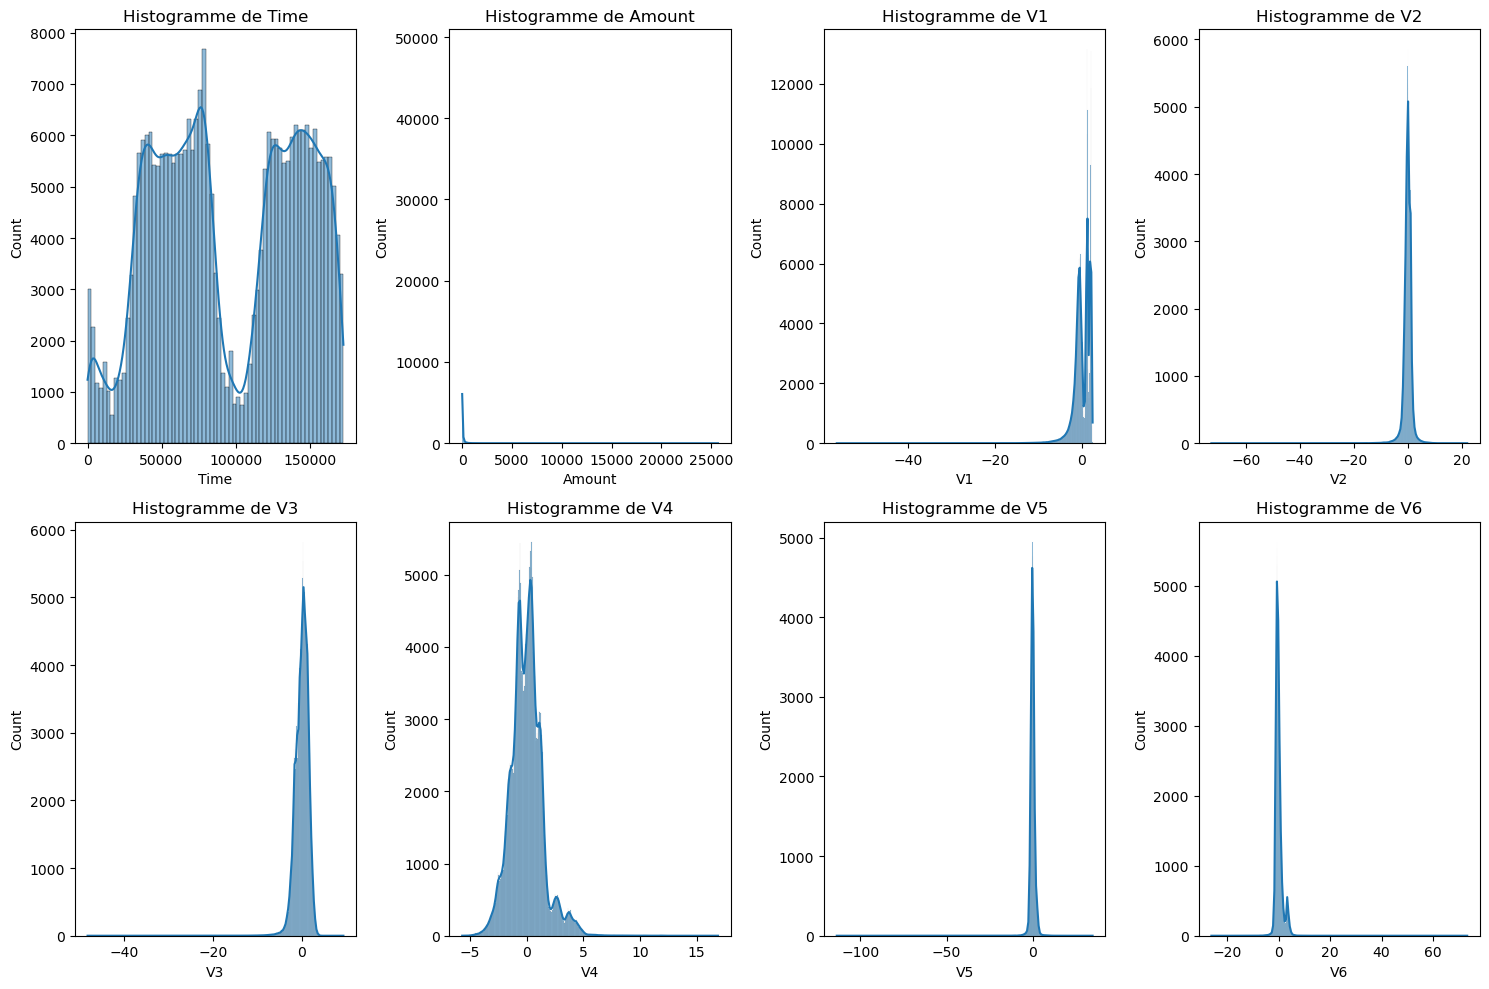

In [ ]:
# Visualisations univariées

# Histogrammes des features les plus importantes avec KDE

important_features = variances.index[:8]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(important_features):
    plt.subplot(2, 4, i+1)
    sns.histplot(df[feature], kde = True)
    plt.title(f'Histogramme de {feature}')
    
plt.tight_layout()
plt.show()

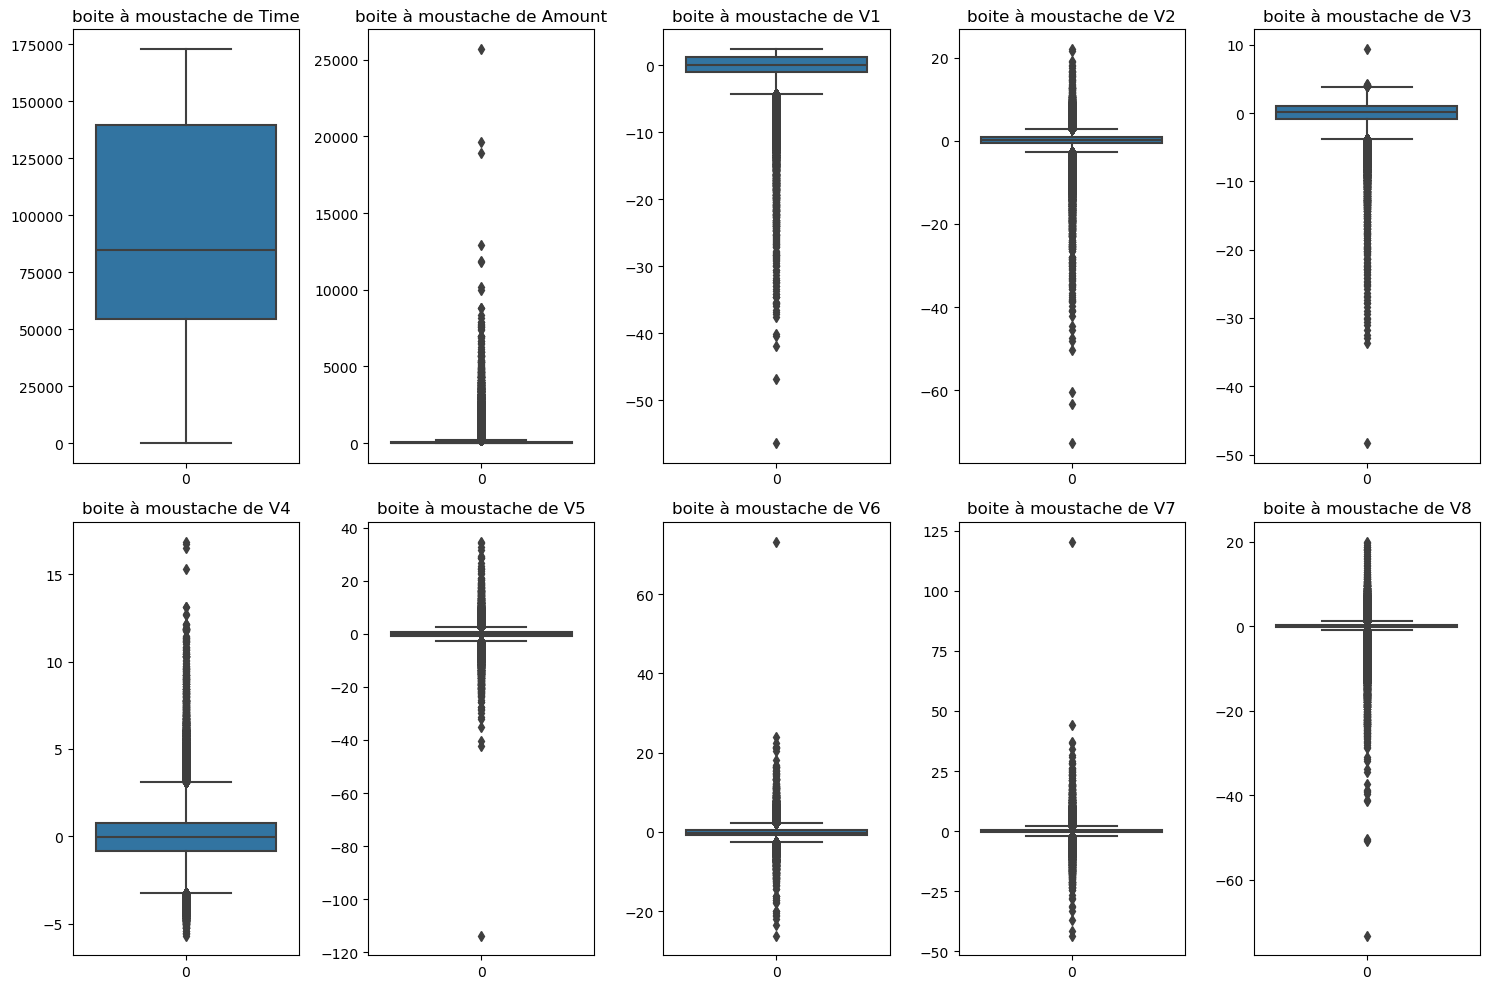

In [ ]:
# Boxplots pour détecter les outliers
important_features = variances.index[:10]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(important_features):
    plt.subplot(2, 5,i+1)
    sns.boxplot(df[feature])
    plt.title(f'boite à moustache de {feature}')
    
plt.tight_layout()
plt.show()

In [ ]:
# Séparer X et y
features = df.drop('Class', axis=1)
target = df['Class']

# Split train/test (stratify pour garder le même taux de fraudes)
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target
)

print("Répartition dans y_train :")
print(y_train.value_counts(normalize=True))

Répartition dans y_train :
Class
0    0.998335
1    0.001665
Name: proportion, dtype: float64


In [ ]:
import sys
print(sys.executable)

c:\Users\user\anaconda3\envs\mlops_formation_v2\python.exe


In [ ]:
!{sys.executable} -m pip install imbalanced-learn


In [ ]:
from imblearn.over_sampling import SMOTE

# Créer l'objet SMOTE
smote = SMOTE(random_state=42)  # k_neighbors=5 par défaut

# Appliquer sur le train uniquement
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Taille avant SMOTE :", X_train.shape, y_train.shape)
print("Taille après SMOTE :", X_train_smote.shape, y_train_smote.shape)
print("\nRépartition après SMOTE :")
print(y_train_smote.value_counts())

Taille avant SMOTE : (226980, 30) (226980,)
Taille après SMOTE : (453204, 30) (453204,)

Répartition après SMOTE :
Class
0    226602
1    226602
Name: count, dtype: int64
